<a href="https://colab.research.google.com/github/Herodegon/ECGR4105-Intro-to-Machine-Learning/blob/main/Assignment3_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, we will use the Diabetes dataset and Cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.)

In [361]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem 1 (20 points)

Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Draw your training results, including loss and classification accuracy over iterations. Also, report your results, including accuracy, precision, and recall, FI score. At the end, plot the confusion matrix representing your binary classifier.

In [362]:
file_path = '/content/drive/MyDrive/ECGR4105/HW3_diabetes.csv'
dataset1 = pd.DataFrame(pd.read_csv(file_path))
M=len(dataset1)
M

768

In [363]:
dataset1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [364]:
X1 = dataset1.iloc[:, [0,1,2,3,4,5,7]].values   # Using Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, and Age as inputs
Y1 = dataset1.iloc[:, 8].values

We'll create a training/test set with an 80/20 split respectively:

In [365]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.20, random_state = 0)

In [366]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X1_train = sc_X.fit_transform(X1_train)
X1_test = sc_X.transform(X1_test)

For this assignment, we will need to use logistic regression. For efficiency purposes, the sklearn "Logistic Regression" function will be used. However, to show that there is already an understanding as to how Logistic Regression works, the following function built to run the model has been provided:

In [367]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def ComputeCost(X,Y,theta):
  m = len(Y)
  predictions = X.dot(theta)                  # Scales X array by current theta value
  errors = np.subtract(predictions,Y)         # Computes the difference between every element of predictions[] and Y[]
  square_errors = np.square(errors)           # Squares the resulting error
  cost = (1/(2*m))*np.sum(square_errors)      # Computes the cost equation {(1/(2*m))*(predictions[]-Y[])^2}
  return cost

def GradientDescent(X,Y,X_test,Y_test,theta,alpha,iterations):
  m = len(Y)                                  # Number of training examples
  cost_history = np.zeros(iterations)         # Initializes empty array of size "iterations"
  valid_history = np.zeros(iterations)        # Initializes empty array of size "iterations"
  for i in range(iterations):
    predictions = sigmoid(X.dot(theta))       # Scales X array by mapping current theta value along sigmoid
    errors = np.subtract(predictions,Y)       # Computes the difference between every element of predictions[] and Y[]
    sum_delta = (alpha/m)*X.T.dot(errors)     # Solves for the sum of delta functions (errors)
    theta = theta - sum_delta                 # New theta is found by taking the difference between current value and solved delta value
    cost_history[i] = ComputeCost(X,Y,theta)  # Computes the cost for the current theta value
    valid_history[i] = ComputeCost(X_test,Y_test,theta)
  return theta, cost_history, valid_history

def TrainModel(X,Y,X_test,Y_test,alpha,iterations):
  theta = np.zeros(X.shape[1])
  theta, cost_history, valid_history = GradientDescent(X,Y,X_test,Y_test,theta,alpha,iterations)
  return theta, cost_history, valid_history

Now, Logistic Regression will be performed on the dataset:

In [368]:
def PlotLoss(training_cost_history,validation_cost_history,iterations,x_label,y_label,title):
  plt.plot(range(iterations),training_cost_history, color='b', label= 'Training Loss')
  plt.plot(range(iterations),validation_cost_history, color='r', label= 'Validation Loss')
  plt.rcParams["figure.figsize"] = (6,4)
  plt.legend()

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

  # Print final graph
  plt.show()
  return

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

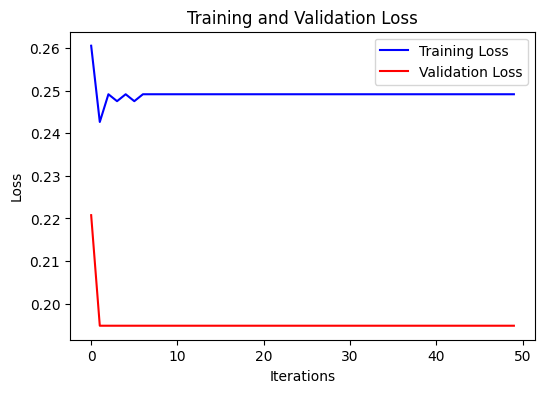

In [369]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state =  0
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
clf = LogisticRegression(random_state=0,max_iter=1,warm_start=True,C=0.01)

iterations = 50
training_cost_history = np.zeros(iterations)
validation_cost_history = np.zeros(iterations)
theta = np.zeros(X1.shape[1])
for i in range(0,iterations):
  clf.fit(X1_train,Y1_train)
  Y1_train_pred = clf.predict(X1_train)
  training_cost_history[i] = mean_squared_error(Y1_train, Y1_train_pred)
  Y1_pred = clf.predict(X1_test)
  validation_cost_history[i] = mean_squared_error(Y1_test, Y1_pred)
#theta,training_cost_history,validation_cost_history = TrainModel(X1_train,Y1_train,X1_test,Y1_test,0.01,iterations)
PlotLoss(training_cost_history,validation_cost_history,iterations,"Iterations","Loss","Training and Validation Loss")

We can gather information about the model using the following functions:

In [370]:
from sklearn import metrics
def PrintData(Y_test,Y_pred):
  print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
  print("Precision:",metrics.precision_score(Y_test, Y_pred))
  print("Recall:",metrics.recall_score(Y_test, Y_pred))
  print("F1 Score:",metrics.f1_score(Y_test, Y_pred))

PrintData(Y1_test,Y1_pred)

Accuracy: 0.8051948051948052
Precision: 0.7931034482758621
Recall: 0.48936170212765956
F1 Score: 0.6052631578947368


Now we will create a confusion matrix of the model's accuracy:

In [371]:
#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y1_test, Y1_pred)

Text(0.5, 357.55555555555554, 'Predicted label')

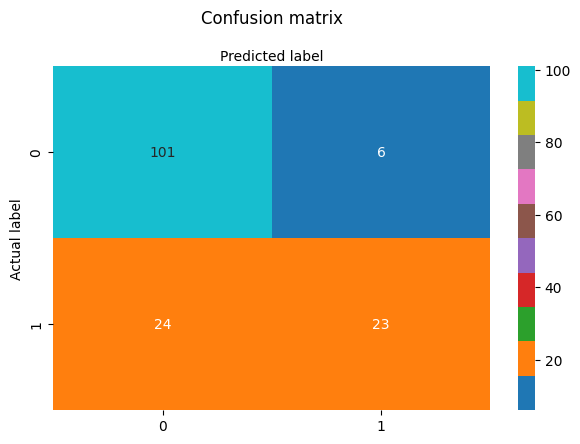

In [372]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="tab10" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')